# Statistical Concepts

https://towardsdatascience.com/hypothesis-testing-in-machine-learning-using-python-a0dc89e169ce

https://nbviewer.jupyter.org/github/Yorko/mlcourse.ai/blob/master/jupyter_english/tutorials/statistical_hypothesis_testing_in_python_panin_kirill.ipynb

https://medium.com/analytics-vidhya/using-the-corrected-paired-students-t-test-for-comparing-the-performance-of-machine-learning-dc6529eaa97f

https://machinelearningmastery.com/statistical-hypothesis-tests-in-python-cheat-sheet/

https://data-flair.training/blogs/python-statistics/

https://github.com/rimanshu/MachineLearning/blob/master/Hypothesis%20testing/Paired%20T-test.ipynb

Videos - https://www.youtube.com/watch?v=4-rxTA_5_xA&t=65s 

How to tell if x, y are independent?

There are two ways to tell if they are independent:

By looking at the p-Value: If the p-Value is less than 0.05, we fail to reject the null hypothesis that the x and y are independent. So for the example output above, (p-Value=2.954e-07), we reject the null hypothesis and conclude that x and y are not independent.

From Chi.sq value: For 2 x 2 contingency tables with 2 degrees of freedom (d.o.f), if the Chi-Squared calculated is greater than 3.841 (critical value), we reject the null hypothesis that the variables are independent. To find the critical value of larger d.o.f contingency tables, use qchisq(0.95, n-1), where n is the number of variables.

# Hypothesis

Hypothesis Testing so important for Data Scientist, because you should know how to check distributions and relations between data.

We evalute two mutually exclusive statements on population using sample of data.

The types of tests to use in different circumstances, such as normality checking, relationships between variables, and differences between samples

Each test will return at least two things:

Statistic: A quantity calculated by the test that can be interpreted in the context of the test via comparing it to critical values from the distribution of the test statistic.
p−value: Used to interpret the test, in first case wheher the sample will drawn from a Gaussian distribution.

we'll be testing data that the sample was drawn from a Gaussian distribution. Technically this is called the null hypothesis, or H0. A threshold level is chosen called alpha, typically 5% (or 0.05), that is used to interpret the p-value

p<=alpha: reject H0, not normal.

p>alpha: fail to reject H0, normal.

we are seeking results with a larger p-value to confirm that our sample was likely drawn from a Gaussian distribution.

A result above 5% DOESN'T MEAN that the null hypothesis is true. It means that it is very likely true given available evidence. The p-value is not the probability of the data fitting a Gaussian distribution

P value and significance value is diff. significance value is value falls under confidance interval. If p value is less than
significance value then we reject the null hypothesis.

Null hypothesis :- In inferential statistics, the null hypothesis is a general statement or default position that there is no relationship between two measured phenomena, or no association among groups. Whatever the default question is will be used as 
null hypothesis.

Type I error: When we reject the null hypothesis, although that hypothesis was true. Type I error is denoted by alpha. In hypothesis testing, the normal curve that shows the critical region is called the alpha region. This is same as FN.

Type II errors: When we accept the null hypothesis but it is false. Type II errors are denoted by beta. In Hypothesis testing, the normal curve that shows the acceptance region is called the beta region. This is same as FP.

One tailed test :- A test of a statistical hypothesis , where the region of rejection is on only one side of the sampling distribution , is called a one-tailed test. It is just giving the diff between the mean of sample distribution and Population distribution. We can find the mean of population and compare with sample mean.                                  
Example :- a college has ≥ 4000 student or data science ≤ 80% org adopted. from scipy.stats import ttest_1samp

Two-tailed test :- A two-tailed test is a statistical test in which the critical area of a distribution is two-sided and tests whether a sample is greater than or less than a certain range of values. If the sample being tested falls into either of the critical areas, the alternative hypothesis is accepted instead of the null hypothesis.                  
Example : a college != 4000 student or data science != 80% org adopted

### Simple Example of Null Hyposthesis :- 

Example : you have a coin and you don’t know whether that is fair or tricky so let’s decide null and alternate hypothesis     
H0 : a coin is a fair coin.             
H1 : a coin is a tricky coin. and alpha = 5% or 0.05                   
Now let’s toss the coin and calculate p- value ( probability value).                          
Toss a coin 1st time and result is tail- P-value = 50% (as head and tail have equal probability)                          
Toss a coin 2nd time and result is tail, now p-value = 50/2 = 25%                            
and similarly we Toss 6 consecutive time and got result as P-value = 1.5% but we set our significance level as 95% means 5% error rate we allow and here we see we are beyond that level i.e. our null- hypothesis does not hold good so we need to reject and propose that this coin is a tricky coin which is actually.

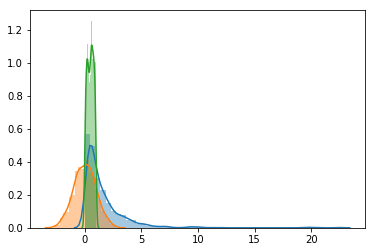

In [6]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

normal = np.random.standard_normal(1000) # Draw random samples from a normal (Gaussian) distribution.
uniform = np.random.uniform(size=1000)
log_normal = np.random.lognormal(size=1000)

sns.distplot(log_normal); sns.distplot(normal);
sns.distplot(uniform);

# Statistical Hyposthesis Test :- 

### Normality Test

statistical tests that you can use to check if your data has a Gaussian distribution. It is based on single feature.

D’Agostino’s K^2 test -

Interpretation

H0: the sample has a Gaussian distribution.
H1: the sample does not have a Gaussian distribution.

Skew is a quantification of how much a distribution is pushed left or right, a measure of asymmetry in the distribution.      
Kurtosis quantifies how much of the distribution is in the tail. It is a simple and commonly used statistical test for normality.

from scipy.stats import normaltest           
stat, p = normaltest(normal)                 
stat1, p1 = normaltest(log_normal)                   

print('Statistics', (stat,p), (stat1,p1)) # Statistics=0.829, p=0.661 - For normal , Statistics=787.383, p=0.000

alpha = 0.05               
if p > alpha:                 
    print('Sample looks Gaussian (fail to reject H0)')              
else:                 
    print('Sample does not look Gaussian (reject H0)')                          
    
Visual Normality Checks - Through Histogram or distplot as above (sns.distplot(normal);) and fig = sm.qqplot(normal, line='s')


### Corelation Test

statistical tests that you can use to check if two samples are related.

x = np.random.normal(0,1,1000)    
y = (3 * x) - np.random.normal(0,2,1000)

Pearson’s Correlation Coefficient - Tests whether two samples have a linear relationship. range is -1 to +1. formula is 
cov(x,y)/stdx * stdy

H0: the two samples are independent.
H1: there is a dependency between the samples.

from scipy.stats import pearsonr

corr, p = pearsonr(x, y)      
corr, p (0.8207236708707059, 7.2042131600280555e-245)

Spearman’s Rank Correlation - Tests whether two samples have a monotonic relationship. Observations in each sample can be ranked. Range is 0 to +1. formula is cov(x,y)/rankofx * rankofy. it captures non-linear properties.

from scipy.stats import spearmanr     
corr, p = spearmanr(x, y)      
corr, p  ((0.8076902436902438, 3.2834508833351045e-231))

### Chi-Squared Test

Chi-Squared Test - Tests whether two categorical variables are related or independent. If you have one categorical feature then we have to apply one sample propotion test.

Chi-Square Test- The test is applied when you have two categorical variables from a single population. It is used to determine whether there is a significant association between the two variables.
For example, in an election survey, voters might be classified by gender (male or female) and voting preference (Democrat, Republican, or Independent). We could use a chi-square test for independence to determine whether gender is related to voting preference

Assumptions

Observations used in the calculation of the contingency table are independent.     
25 or more examples in each cell of the contingency table.          
Interpretation     
H0: the two samples are independent.
H1: there is a dependency between the samples.

from scipy.stats import chi2_contingency                  
table = [[10, 20, 30],[6,  9,  17]]          # Make one dataframe from crosstab function from two categorical feature.                
stat, p, dof, expected = chi2_contingency(table)                     
print('stat=%.3f, p=%.3f' % (stat, p))                    
if p > 0.05:                  
	print('Probably independent')              
else:                  
	print('Probably dependent')                  

### P Value

p-value for a statistical model is the probability that when the null hypothesis is true              
The p-value can be thought of as the probability of observing the two data samples given the base assumption (null hypothesis) that the two samples were drawn from a population with the same distribution.

p <= alpha: reject null hypothesis, different distribution.
p > alpha: fail to reject null hypothesis, same distribution

x1 = 3*np.random.randn(1000) + 20                       
x2 = 3*np.random.randn(1000) + 21                           
print('x1: mean=%.3f stdv=%.3f' % (np.mean(x1), np.std(x1)))                  
print('x2: mean=%.3f stdv=%.3f' % (np.mean(x2), np.std(x2)))                 
sns.distplot(x1);sns.distplot(x2);                         

### Stationary Tests

This section lists statistical tests that you can use to check if a time series is stationary or not.

Augmented Dickey-Fuller Unit Root Test - Tests whether a time series has a unit root, e.g. has a trend or more generally is autoregressive.

Assumptions     
Observations in are temporally ordered.      
Interpretation              
H0: a unit root is present (series is non-stationary).           
H1: a unit root is not present (series is stationary).            

Example of the Augmented Dickey-Fuller unit root test                 
from statsmodels.tsa.stattools import adfuller               
data = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]                      
stat, p, lags, obs, crit, t = adfuller(data)                  
print('stat=%.3f, p=%.3f' % (stat, p))                 
if p > 0.05:             
	print('Probably not Stationary')                     
else:                                  
	print('Probably Stationary')                    

### Parametric Statistical Hypothesis Tests

https://www.youtube.com/watch?v=YrhlQB3mQFI&list=PLZoTAELRMXVPBTrWtJkn3wWQxZkmTXGwe&index=43 

### one categorical feature - One sample proportion test. Two Categorical feature - Chi Square test
### One numerical or two numerical test = t test and two categorical with more than 2 category and one numerical - Anova test

Student’s t-test - It is for independent samples. Tests whether the means of two independent samples are significantly different. One of the most commonly used t tests is the independent samples t test. You use this test when you want to compare the means of two independent samples on a given variable

We can use ttest when two numeric or continious variable or (one numeric and one binary categorical feature). Example Gender(binary only), Weight or Weight and Height. It is for two tailed test. One tailed test can be for one variable i.e numeric and Categorical.

Assumptions                        
Observations in each sample are independent and identically distributed (iid).            
Observations in each sample are normally distributed.               
Observations in each sample have the same variance.                 
Interpretation                               

H0: the means of the samples are equal.                  
H1: the means of the samples are unequal.                
    
from scipy.stats import ttest_ind                        
stat, p = ttest_ind(x1, x2)                         
print('P value:', p)                      
alpha = 0.05                            
P value: 1.810726433096305e-13                 

Paired Student’s t-test - It is for dependent samples
Tests whether the means of two paired samples are significantly different. The paired Student’s t-test for quantifying the difference between the mean of two dependent data samples.

When you want to check the mean of two different sample from same population distribution.

Paired sampled t-test :- The paired sample t-test is also called dependent sample t-test. It’s an uni variate test that tests for a significant difference between 2 related variables. An example of this is if you where to collect the blood pressure for an individual before and after some treatment, condition, or time point.             
H0 :- means difference between two sample is 0               
H1:- mean difference between two sample is not 0

Assumptions             
Observations in each sample are independent and identically distributed (iid).                 
Observations in each sample are normally distributed.                
Observations in each sample have the same variance.                    
Observations across each sample are paired.                     
Interpretation

H0: the means of the samples are equal.              
H1: the means of the samples are unequal.
    
from scipy.stats import ttest_rel         
stat, p = ttest_rel(x1, x2)                 
print('P value:', p)                 
alpha = 0.05            
P value: 2.0798605083628403e-12
Different distributions (reject H0)

When you can run a Z Test - Your sample size is greater than 30 ans we know the mean and std. Otherwise, use a t test.

import pandas as pd           
from scipy import stats                                 
from statsmodels.stats import weightstats as stests                       
ztest ,pval = stests.ztest(df['bp_before'], x2=None, value=156)                    
ztest ,pval1 = stests.ztest(df['bp_before'], x2=df['bp_after'], value=0,alternative='two-sided')

Analysis of Variance Test (ANOVA) ¶
Tests whether the means of two or more independent samples are significantly different. The ANOVA and repeated measures ANOVA for checking the similarity or difference between the means of 2 or more data samples. It will use when more than two categories and one or more numeric feature

ANOVA (F-TEST) :- The t-test works well when dealing with two groups, but sometimes we want to compare more than two groups at the same time. For example, if we wanted to test whether voter age differs based on some categorical variable like race, we have to compare the means of each level or group the variable. We could carry out a separate t-test for each pair of groups, but when you conduct many tests you increase the chances of false positives. The analysis of variance or ANOVA is a statistical inference test that lets you compare multiple groups at the same time.

F = Between group variability / Within group variability

H0: the means of the samples are equal.
H1: one or more of the means of the samples are unequal.

It tell whether two or more groups are similar or not based on their mean similarity and f-score.
Example : there are 3 different category of plant and their weight and need to check whether all 3 group are similar or not (code in python below)

from scipy.stats import f_oneway                                
df_anova = pd.read_csv('PlantGrowth.csv')                      
df_anova = df_anova[['weight','group']]                    
grps = pd.unique(df_anova.group.values)                   
d_data = {grp:df_anova['weight'][df_anova.group == grp] for grp in grps}                
 
F, p = f_oneway(d_data['ctrl'], d_data['trt1'], d_data['trt2'])              
print("p-value for significance is: ", p)


Two Way F-test :- Two way F-test is extension of 1-way f-test, it is used when we have 2 independent variable and 2+ groups. 2-way F-test does not tell which variable is dominant. if we need to check individual significance then Post-hoc testing need to be performed.

import statsmodels.api as sm                 
from statsmodels.formula.api import ols                           
df_anova2 = pd.read_csv("https://raw.githubusercontent.com/Opensourcefordatascience/Data-sets/master/crop_yield.csv")         
model = ols('Yield ~ C(Fert)*C(Water)', df_anova2).fit()                         
print(f"Overall model F({model.df_model: .0f},{model.df_resid: .0f}) = {model.fvalue: .3f}, p = {model.f_pvalue: .4f}")     
res = sm.stats.anova_lm(model, typ= 2)              
res


In [ ]:
#https://medium.com/datadriveninvestor/a-quick-guide-to-hypothesis-testing-8c95205f2a1c
#https://medium.com/codezillas/statistics-review-for-data-scientists-and-management-df8f94760221
#https://medium.com/@ageitgey/machine-learning-is-fun-80ea3ec3c471 ---- very important
#https://towardsdatascience.com/hypothesis-testing-in-machine-learning-using-python-a0dc89e169ce

#In Hypothesis testing we make an assumption about the data and then perform investigation considering that our assumption is true
#Now the observation we get from our investigation is used for validating our assumption.

# It sounds confusing but please be patient everything will be clear as you go down.

# Let me define some terms :
# Null hypothesis(H0) : A null hypothesis is the assumption we made before performing any calculation and consider it to be “true”
#initially.
# Alternative hypothesis(H1) : An alternative hypothesis is simply opposite of null hypothesis if there is strong evidence against
#null hypothesis then we move to alternative hypothesis.
# P — Value : P-value is the probability for a given statistical model , when the null hypothesis is true. p-value is used as a 
#rejection point to provide the smallest level of significance at which the null hypothesis would be rejected.
# Test Statistics : A value calculated from a sample or experiment. Test statistics can be any value like mean of a distribution,
#frequency of observation or anything it provide evidence either in support or against of null hypothesis.


In [18]:
#AUC and ROC curve - Relationship between sensivity(recall) and 1- specificity(-ve recall)
#https://techgrabyte.com/10-machine-learning-algorithms-application/

In [ ]:
#probability and P&C
#Independent Events - P(A and B) = P(A) × P(B)
#Conditional or dependent events -P(A and B) = P(A) x P(B|A) or P(B|A) = P(A and B) / P(A) -PB|A means probability of b after a.
#70% of your friends like Chocolate, and 35% like Chocolate AND like Strawberry.
#What percent of those who like Chocolate also like Strawberry?
#P(Strawberry|Chocolate) = P(Chocolate and Strawberry) / P(Chocolate)
#Mutually Exclusive events -P(A or B) = P(A) + P(B) coz P(A and B) is 0.
#A card cannot be a King AND a Queen at the same time!
 
#Dependent Events (such as removing marbles from a bag) are affected by previous events
#Independent events (such as a coin toss) are not affected by previous events

#Permutation and Combination 
#When the order doesn't matter, it is a Combination.
#When the order does matter it is a Permutation.
#Permutations -There are basically two types of permutation: 10P3
#Repetition is Allowed: such as the lock above. It could be "333". - n × n × ... (r times) = nr
#No Repetition: for example the first three people in a running race. You can't be first and second. n!/(n − r)!

#Combinations without Repetition - n!/r!(n − r)!

#Bayes Theorem - P(A|B) =	 P(A) P(B|A)/P(B) or P(Rain|Cloud) =  P(Rain) P(Cloud|Rain)/P(Cloud)